# Modules

In [39]:
import spectral_analysis as sa
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import importlib
import sys
module = sys.modules["spectral_analysis"]
importlib.reload(module)

<module 'spectral_analysis' from 'd:\\Users\\rewas\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\spectral_analysis.py'>

In [40]:
method = "slope"
if method == "rect":
    method_descr = "Fit rectangle and compute its shift."
if method == "fit":
    method_descr = "Fit shear by minimizing squared error."
if method == "com":
    method_descr = "Compute the shift of the center of mass."
if method == "slope":
    method_descr = "Compute the shift of the slopes."

# Shears

0.009102235363030077
0.01917111945613877
0.030819211752791092
0.04103152440554035
0.05996857642059897
0.07617849373915626
0.08709749085763537
0.09645321627919684


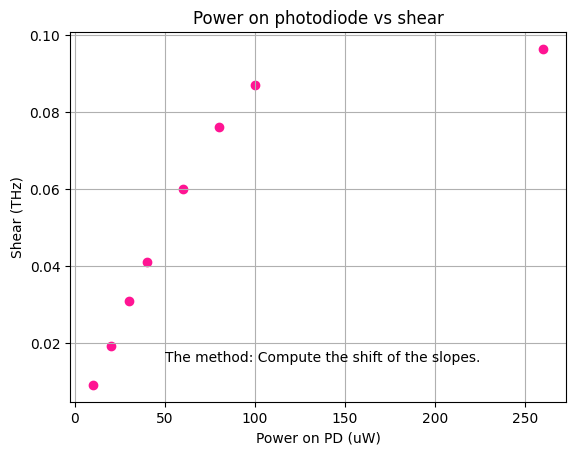

In [41]:
voltages = [10, 20, 30, 40, 60, 80, 100, 260]

shears = []

for voltage in voltages:

    shear = sa.find_shear("data/{}uW_notsheared.csv".format(voltage), "data/{}uW_sheared.csv".format(voltage), plot = False, smoothing_period = 1/15, how = method)
    print(shear)
    shears.append(shear)

plt.scatter(voltages, shears, color = "deeppink")
plt.grid()
plt.xlabel("Power on PD (uW)")
plt.ylabel("Shear (THz)")
plt.title("Power on photodiode vs shear")
plt.text(x = 50, y = 0.015, s = "The method: {}".format(method_descr))
plt.savefig("PD_vs_shear_{}.jpg".format(method))
plt.show()

Starting SPIDER calculations.

1/8
2/8
3/8
4/8
5/8
6/8
7/8
8/8

Yaaay! Everything seems fine!



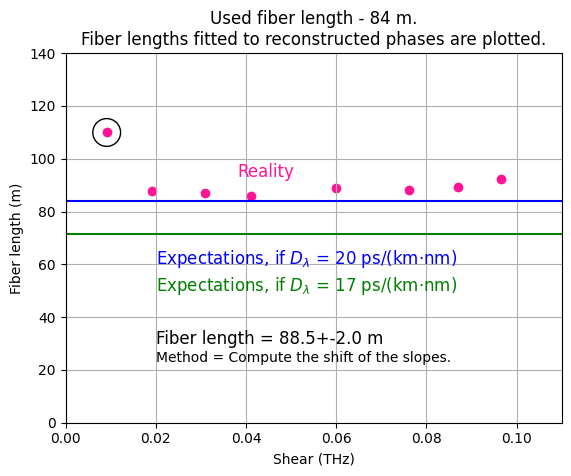

In [42]:
phases = []

print("Starting SPIDER calculations.\n")

for i in range(len(voltages)):
    phase = sa.spider(phase_spectrum = "data/{}uW_pspectrum.csv".format(voltages[i]),
                      temporal_spectrum = "data/{}uW_tspectrum.csv".format(voltages[i]),
                      shear = shears[i],
                      smoothing_period = 0.065,
                      plot_phase = False,
                      plot_steps = False,
                      plot_shear = False,
                      what_to_return = "phase",
                      sheared_is_bigger=True
                      )[1]
    phases.append(phase)
    print("{}/{}".format(i+1, len(voltages)))

print("\nYaaay! Everything seems fine!\n")

fibers = []

for i in range(len(voltages)):
    fibers.append(sa.fit_fiber_length(phases[i], plot = False))

plt.scatter(shears, fibers, color = "deeppink")
plt.axhline(y = 84, color = "blue")
plt.axhline(y = 84*17/20, color = "green")
plt.text(x = 0.02, y = 50, s = r"Expectations, if $D_\lambda$ = 17 ps/(km$\cdot$nm)", color = "green", size = "large")
plt.text(x = 0.02, y = 60, s = r"Expectations, if $D_\lambda$ = 20 ps/(km$\cdot$nm)", color = "blue", size = "large")
plt.text(x = 0.038, y = 93, s = "Reality", color = "deeppink", size = "large")
plt.text(x = 0.02, y = 30, s = "Fiber length = {}+-{} m".format(round(np.mean(fibers[1:]), 1), round(np.std(fibers[1:]), 1)), size = "large")
plt.text(x = 0.02, y = 23, s = "Method = {}".format(method_descr))
plt.grid()
plt.title("Used fiber length - 84 m.\nFiber lengths fitted to reconstructed phases are plotted.")
plt.ylim([0, 140])
plt.xlim([0, 0.11])
plt.scatter([shears[0]], [fibers[0]], s = 400, facecolors = 'none', edgecolors = 'black')
plt.xlabel("Shear (THz)")
plt.ylabel("Fiber length (m)")
plt.savefig("best_fit_fiber_{}.jpg".format(method))
plt.show()